<p align="center"> <img src="https://drive.google.com/uc?export=view&id=19ig7YaRrHpMhKMiVvwtqRXRWYQS-Wous"> </p>


# Task - 3 Music Recommendation System

##### ***Author: Saumya Gupta, Data Science Intern at LetsGrowMore***


Music recommender systems can suggest songs to users based on their listening patterns.

**Link for the dataset:** https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data


## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Reading the dataset

In [2]:
songs_data = pd.read_csv("/content/drive/MyDrive/songs.csv")
songs_extra_info =  pd.read_csv("/content/drive/MyDrive/song_extra_info.csv")
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
members_data = pd.read_csv("/content/drive/MyDrive/members.csv")
sample_submission_data = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

### Displaying all the datasets

In [4]:
songs_data

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [5]:
songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [6]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [7]:
test_data

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [8]:
members_data

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [9]:
sample_submission_data

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5


### Displaying the shape

In [10]:
print(f"The songs_data has {songs_data.shape[0]} rows and {songs_data.shape[1]} columns")
print(f"The songs_extra_info_data  has {songs_extra_info.shape[0]} rows and {songs_extra_info.shape[1]} columns")
print(f"The members_data has {members_data.shape[0]} rows and {members_data.shape[1]} columns")
print(f"The sample_submission_data  has {sample_submission_data.shape[0]} rows and {sample_submission_data.shape[1]} columns")
print(f"The train_data has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test_data has {test_data.shape[0]} rows and {test_data.shape[1]} columns")



The songs_data has 2296320 rows and 7 columns
The songs_extra_info_data  has 2295971 rows and 3 columns
The members_data has 34403 rows and 7 columns
The sample_submission_data  has 2556790 rows and 2 columns
The train_data has 7377418 rows and 6 columns
The test_data has 2556790 rows and 6 columns


# EDA on Songs dataset

In [11]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [12]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [13]:
print(f"Number of records : {songs_data.shape[0]}")
print(f"Count of distinct song lengths : {len(songs_data.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs_data.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs_data.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs_data.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs_data.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs_data.language.unique())}")


Number of records : 2296320
Count of distinct song lengths : 146534
Count of distinct genre ids : 1046
Count of distinct artist name : 222363
Count of distinct composer : 329824
Count of distinct lyricist : 110926
Count of distinct languages : 11


In [14]:
songs_data.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


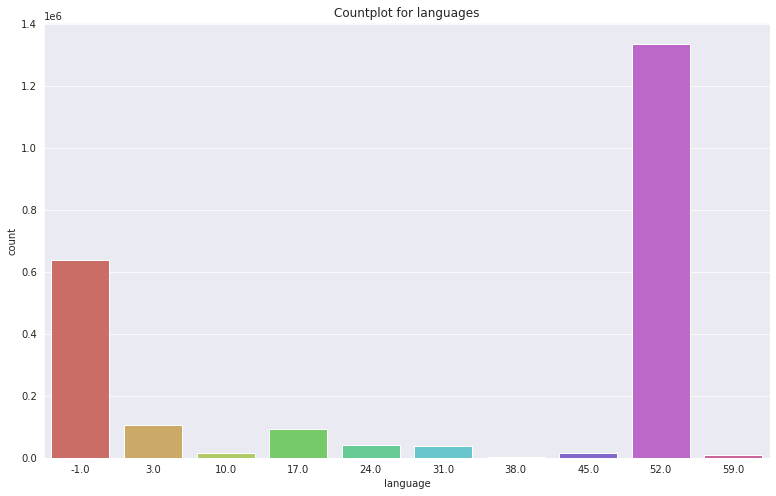

In [15]:
plt.figure(figsize = (13, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs_data.language, data = songs_data.language,palette="hls",)
ax.set_title("Countplot for languages")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


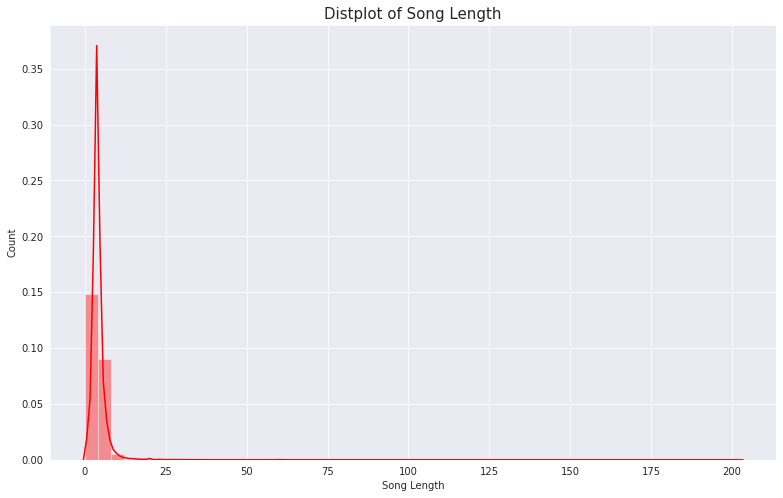

In [16]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
ax = sns.distplot(songs_data.song_length/60000, color='r')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

In [17]:
songs_data.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [18]:
songs_data.genre_ids.value_counts()

465              567911
958              176349
2022             168870
1609             166457
2122             139938
                  ...  
465|139|388           1
409|1609              1
139|94|2022           1
352|1944|1995         1
1138|2022             1
Name: genre_ids, Length: 1045, dtype: int64

In [19]:
songs_data['genre_ids'].fillna('465',inplace=True)

In [20]:
songs_data['language'].value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

In [21]:
songs_data['language'].fillna(52.0,inplace=True)

In [22]:
songs_data.drop(['composer'], axis =1, inplace=True)
songs_data.drop(['lyricist'], axis =1, inplace=True)

In [23]:
songs_data.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

In [24]:
songs_data

,song_id,song_length,genre_ids,artist_name,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,52.0
...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,52.0


# EDA on songs_extra_info dataset

In [25]:
print("Columns present in the songs_extra_info are:")
for columns in songs_extra_info.columns:
    print(columns)

Columns present in the songs_extra_info are:
song_id
name
isrc


In [26]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [27]:
songs_extra_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [28]:
songs_extra_info.drop('isrc', axis = 1, inplace = True)

# EDA on member dataset

In [29]:
print("Columns present in the members_data are:")
for columns in members_data.columns:
    print(columns)

Columns present in the members_data are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


In [30]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for gender')

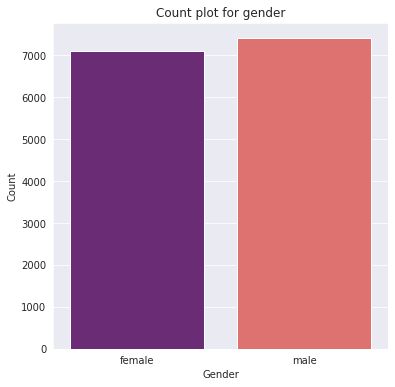

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(members_data['gender'], data=members_data, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for gender')

In [32]:
members_data.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [33]:
members_data.fillna('male', inplace = True)

In [34]:
members_data.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for Registation Method')

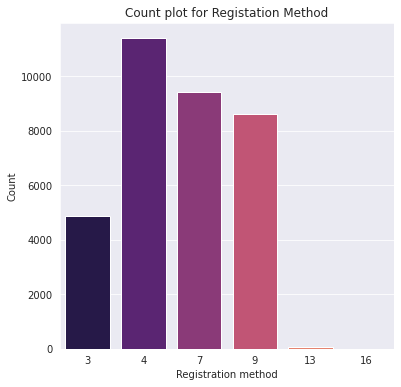

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(members_data['registered_via'], data=members_data, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for Registation Method')

# EDA on Training set

In [36]:
print(f"Total number of records : {train_data.shape[0]}")

Total number of records : 7377418


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for system tab there are using')

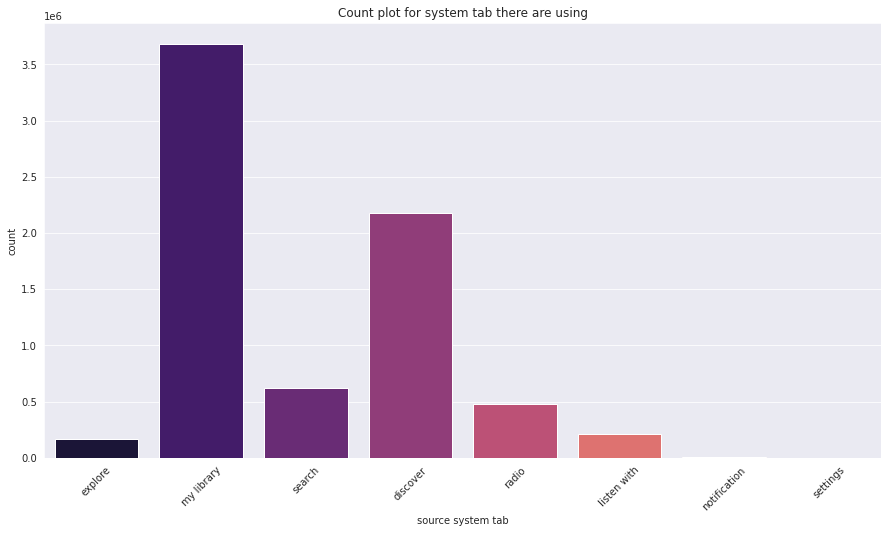

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(train_data['source_system_tab'],data=train_data, palette = 'magma')
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using')

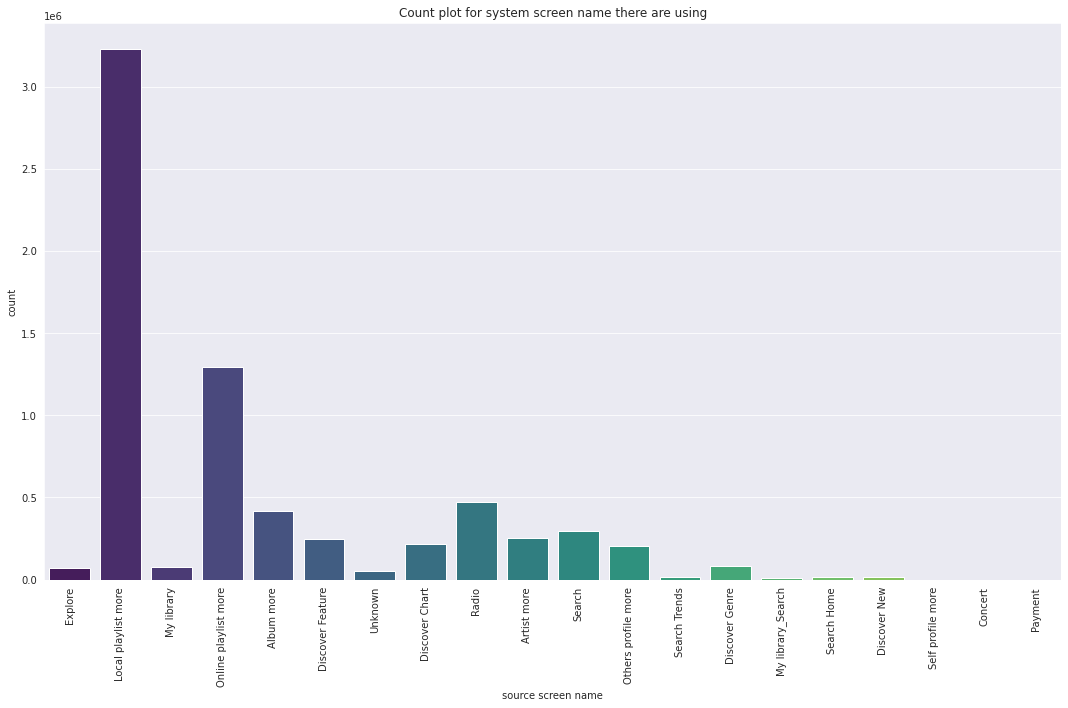

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_data['source_screen_name'],data=train_data, palette = 'viridis')
sns.set(style="darkgrid")
plt.xlabel('source screen name')
plt.ylabel('count')
plt.xticks(rotation='90')
plt.title('Count plot for system screen name there are using')
plt.tight_layout()

In [39]:
print("Total percentage for NaN value in target column  : ",(train_data["target"].isna().sum()/len(train_data["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0 %


In [40]:
duplicate_values = len(train_data["msno"])-train_data["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train_data["msno"]))*100,"%")

Total no of duplicate user id         :  7346663
Total percentage of duplicate user id :  99.58311973104954 %


In [41]:
duplicate_values1 = len(train_data["song_id"])-train_data["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train_data["song_id"]))*100,"%")

Total no of duplicate song id         :  7017452
Total percentage of duplicate song id :  95.12070483196153 %


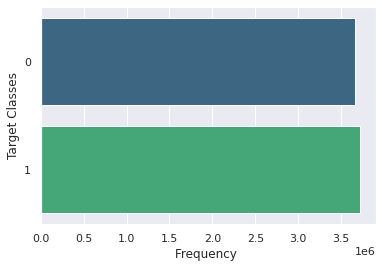

In [42]:
sns.countplot(y=train_data['target'],data=train_data, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

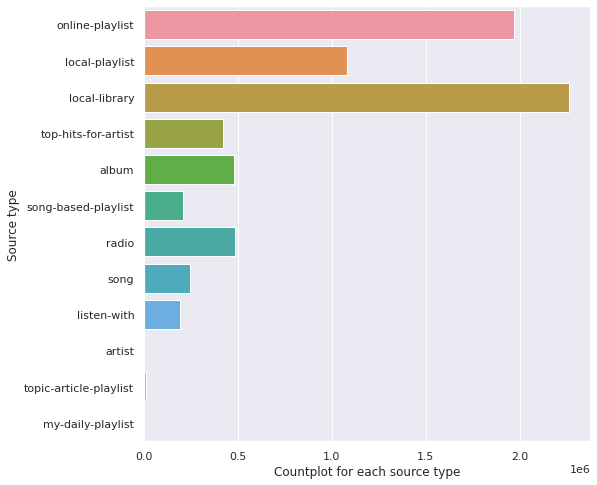

In [43]:
plt.figure(figsize = (8,8))
sns.countplot(y=train_data['source_type'],data=train_data)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()

In [44]:
train_data.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [45]:
train_data['source_system_tab'].fillna('my library',inplace=True)
train_data['source_type'].fillna('local-library',inplace=True)
train_data['source_screen_name'].fillna('Local playlist',inplace=True)

In [46]:
train_data.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [47]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


# Displaying information about the Test Dataset and Sample Submission Dataset

In [48]:
print("Columns present in the test_data are:")
for columns in test_data.columns:
    print(columns)

Columns present in the test_data are:
id
msno
song_id
source_system_tab
source_screen_name
source_type


In [49]:
print("Columns present in the sample_submission_data are:")
for columns in sample_submission_data.columns:
    print(columns)

Columns present in the sample_submission_data are:
id
target


# Merging the datasets

In [50]:
merged_songs = pd.merge(songs_data, songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(train_data, members_data, on ='msno' ,how='left')
train_data = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [51]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,male,7,20120102,20171005,206471.0,359,Bastille,52.0,Good Grief
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,52.0,Lords of Cardboard
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,52.0,Hip Hop Is Dead(Album Version (Edited))
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,-1.0,Disco Africa
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,male,7,20120102,20171005,187802.0,1011,Brett Young,52.0,Sleep Without You
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,4,26,female,9,20041218,20170930,267958.0,1259,Dr. Dre,52.0,Still D.R.E.
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,1,0,male,7,20130627,20171006,227404.0,465,R. City feat. Adam Levine,52.0,Locked Away
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,1,0,male,7,20130627,20171006,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),3.0,FLY OUT
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,5,0,male,9,20150213,20170918,524146.0,2122,Brad Mehldau Trio,52.0,Wonderwall


# Data Preprocessing & Label Encoding

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   city                    int64  
 7   bd                      int64  
 8   gender                  object 
 9   registered_via          int64  
 10  registration_init_time  int64  
 11  expiration_date         int64  
 12  song_length             float64
 13  genre_ids               object 
 14  artist_name             object 
 15  language                float64
 16  name                    object 
dtypes: float64(2), int64(6), object(9)
memory usage: 1013.1+ MB


In [53]:
train_data.drop(['msno'], axis = 1, inplace=True)
train_data.drop(['song_id'], axis = 1, inplace=True)

In [54]:
df = train_data

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [56]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids

In [57]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,7,6,1,1,0,1,7,20120102,20171005,206471.0,285,3277,52.0,51442
1,3,9,4,1,13,24,0,9,20110525,20170911,284584.0,90,31960,52.0,81294
2,3,9,4,1,13,24,0,9,20110525,20170911,225396.0,90,21372,52.0,57304
3,3,9,4,1,13,24,0,9,20110525,20170911,255512.0,6,27439,-1.0,34727
4,1,7,6,1,1,0,1,7,20120102,20171005,187802.0,2,4472,52.0,121784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,3,9,4,1,4,26,0,9,20041218,20170930,267958.0,90,8749,52.0,126867
7377414,6,16,8,0,1,0,1,7,20130627,20171006,227404.0,344,24013,52.0,80660
7377415,6,16,8,1,1,0,1,7,20130627,20171006,258298.0,344,34936,3.0,42509
7377416,0,5,6,1,5,0,1,9,20150213,20170918,524146.0,219,4380,52.0,156374


In [58]:
df.isnull().sum()

source_system_tab           0
source_screen_name          0
source_type                 0
target                      0
city                        0
bd                          0
gender                      0
registered_via              0
registration_init_time      0
expiration_date             0
song_length               114
genre_ids                   0
artist_name                 0
language                  114
name                        0
dtype: int64

In [59]:
df.dropna(subset = ['genre_ids', 'song_length', 'language'], inplace = True)

In [60]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,7,6,1,1,0,1,7,20120102,20171005,206471.0,285,3277,52.0,51442
1,3,9,4,1,13,24,0,9,20110525,20170911,284584.0,90,31960,52.0,81294
2,3,9,4,1,13,24,0,9,20110525,20170911,225396.0,90,21372,52.0,57304
3,3,9,4,1,13,24,0,9,20110525,20170911,255512.0,6,27439,-1.0,34727
4,1,7,6,1,1,0,1,7,20120102,20171005,187802.0,2,4472,52.0,121784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,3,9,4,1,4,26,0,9,20041218,20170930,267958.0,90,8749,52.0,126867
7377414,6,16,8,0,1,0,1,7,20130627,20171006,227404.0,344,24013,52.0,80660
7377415,6,16,8,1,1,0,1,7,20130627,20171006,258298.0,344,34936,3.0,42509
7377416,0,5,6,1,5,0,1,9,20150213,20170918,524146.0,219,4380,52.0,156374


In [61]:
df.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [62]:
df.to_csv('preprocessed_data2.csv')

In [63]:
df1 = df[0:30000]

# Model Building and Evaluation

In [64]:
Y = df1.target
X = df1.drop('target', axis = 1)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [67]:
X_train.shape

(22500, 14)

In [68]:
X_test.shape

(7500, 14)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [70]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

## Model Evaluation

In [72]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)
print ("\nConfusion matrix :\n",confusion_matrix(Y_test, pred))

Accuracy is : 82.50666666666666

Confusion matrix :
 [[ 832 1006]
 [ 306 5356]]


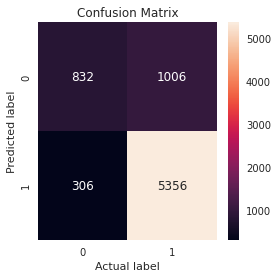

In [91]:
plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

In [75]:
pred_prob = rfc.predict_proba(X_test)

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])

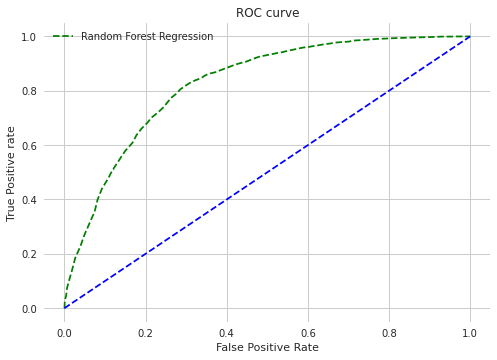

In [89]:
sns.set_style('whitegrid')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='Random Forest Regression')
#plt.plot(thresh, linestyle='--', color='blue')
plt.plot([0, 1], ls="--", color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();

# Thank You!